In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_zcs(mb="mb32",physics="hydro",CC="icpx",machine="granite"):
    n = np.array([1, 2, 4, 8, 16, 32, 64, 96])
    scratch_dir = f"/scratch/gpfs/changgoo/{machine}/blast-scaling-{CC}"
    zcs = []
    ntask = []
    for n_ in n:
        fname = os.path.join(scratch_dir, f"{physics}-{mb}_n{n_}", "out.txt")
        if os.path.exists(fname) == False:
            continue
        with open(fname, "r") as f:
            lines = f.readlines()
        zcs.append(eval(lines[-1].split("=")[-1].strip()))
        ntask.append(n_)
    zcs = np.array(zcs)
    return ntask, zcs

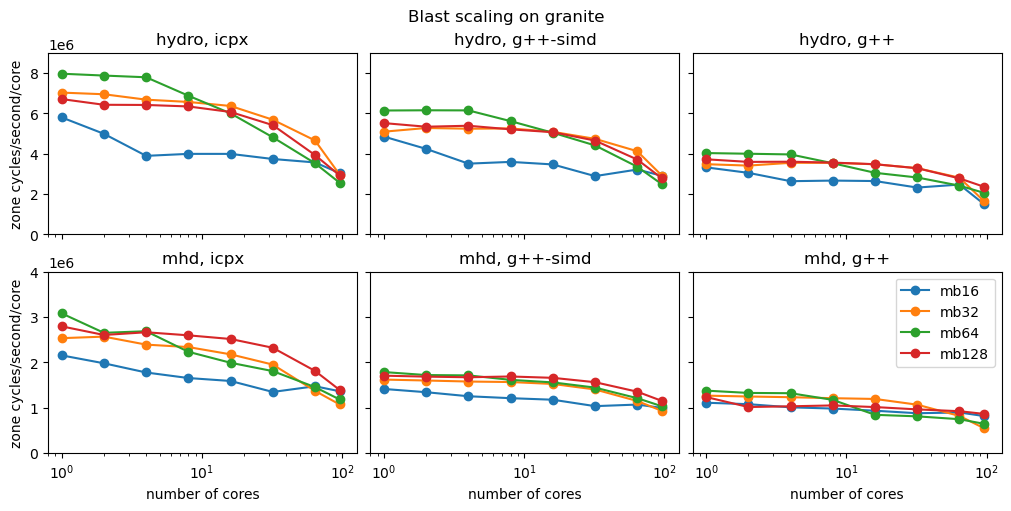

In [3]:
fig,axes = plt.subplots(2,3,figsize=(10,5),
                        sharey="row", sharex=True, constrained_layout=True)
machine="granite"
for physics, axes_ in zip(["hydro", "mhd"], axes):
    for ax, CC in zip(axes_, ["icpx", "g++-simd", "g++"]):
        plt.sca(ax)
        plt.title(f"{physics}, {CC}")
        for mb in ["mb16", "mb32", "mb64", "mb128", "mb256"]:
            n, zcs = get_zcs(mb=mb,CC=CC,physics=physics,machine=machine)
            if len(zcs) == 0:
                continue
            plt.plot(n, zcs/n, 'o-', label=mb)

        plt.xscale("log")
        if CC=="icpx":
            plt.ylabel("zone cycles/second/core")
        if physics=="mhd":
            plt.xlabel("number of cores")
    if physics == "hydro":
        plt.ylim(0, 9.e6)
    else:
        plt.ylim(0, 4.e6)
    plt.xlim(0.8,128)
plt.legend()
plt.suptitle(f"Blast scaling on {machine}")
plt.savefig(f"blast-scaling-{machine}.png")

Text(0.5, 0.98, 'Blast scaling on granite')

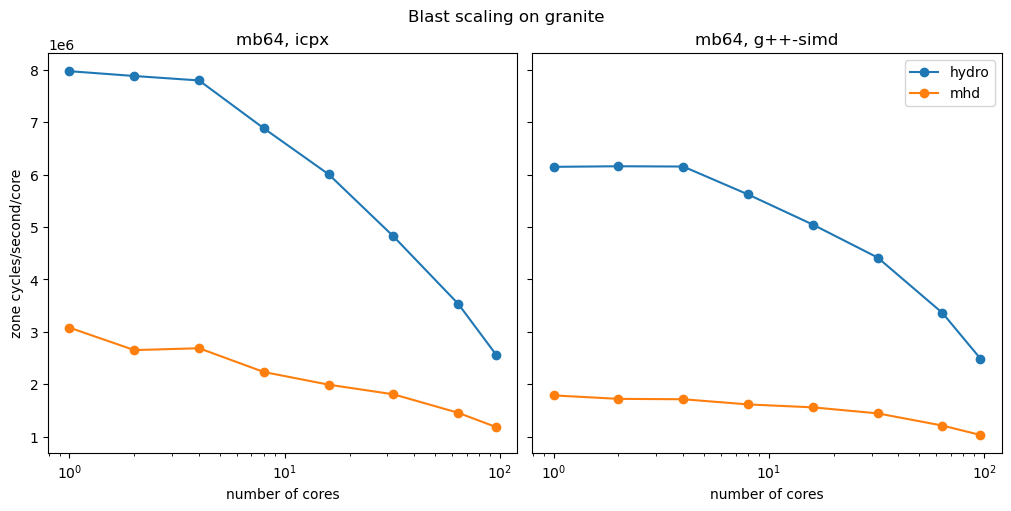

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5),
                        sharey="row", sharex=True, constrained_layout=True)
machine="granite"
mb="mb64"
for ax, CC in zip(axes, ["icpx", "g++-simd"]):
    plt.sca(ax)
    plt.title(f"{mb}, {CC}")
    for physics in ["hydro", "mhd"]:
        n, zcs = get_zcs(mb=mb,CC=CC,physics=physics,machine=machine)
        if len(zcs) == 0:
            continue
        plt.plot(n, zcs/n, 'o-', label=physics)

    plt.xscale("log")
    if CC=="icpx":
        plt.ylabel("zone cycles/second/core")
    if physics=="mhd":
        plt.xlabel("number of cores")
plt.legend()
plt.suptitle(f"Blast scaling on {machine}")
# plt.savefig(f"blast-scaling-{machine}.png")

Text(0.5, 0.98, 'Blast scaling on granite')

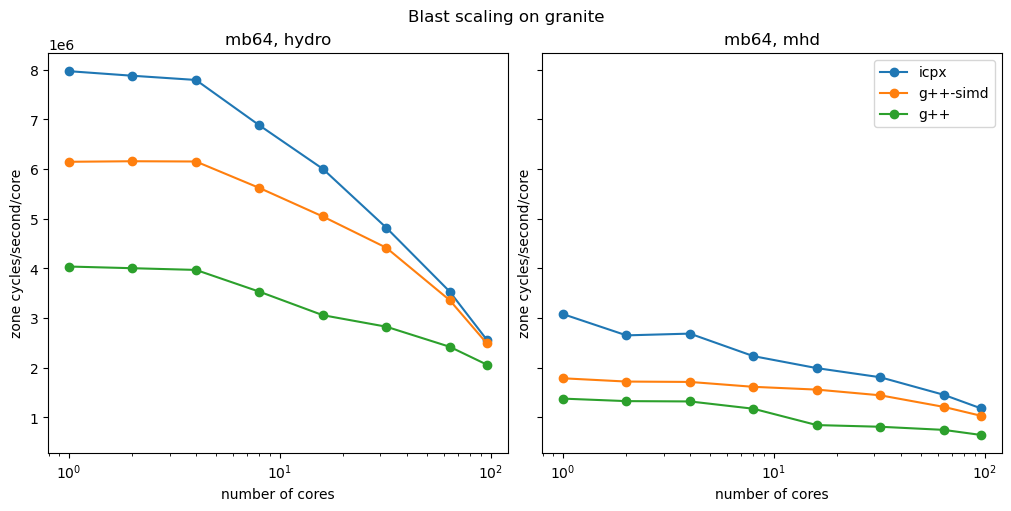

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5),
                        sharey="row", sharex=True, constrained_layout=True)
machine="granite"
mb="mb64"
for ax, physics in zip(axes,  ["hydro", "mhd"]):
    plt.sca(ax)
    plt.title(f"{mb}, {physics}")
    for CC in ["icpx", "g++-simd", "g++"]:
        n, zcs = get_zcs(mb=mb,CC=CC,physics=physics,machine=machine)
        if len(zcs) == 0:
            continue
        plt.plot(n, zcs/n, 'o-', label=CC)

    plt.xscale("log")

    plt.ylabel("zone cycles/second/core")
    plt.xlabel("number of cores")
plt.legend()
plt.suptitle(f"Blast scaling on {machine}")
# plt.savefig(f"blast-scaling-{machine}.png")

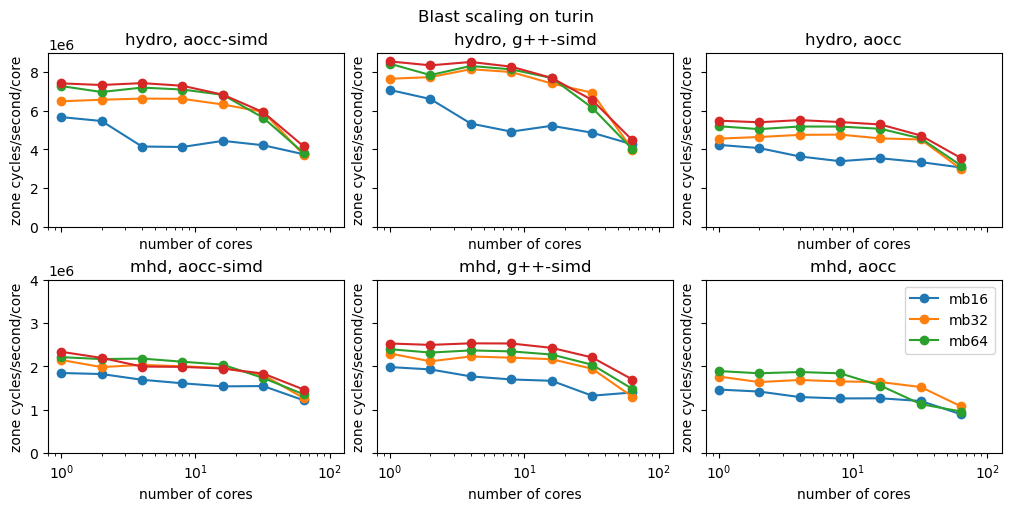

In [72]:
fig,axes = plt.subplots(2,3,figsize=(10,5),
                        sharey="row", sharex=True, constrained_layout=True)
machine="turin"
for physics, axes_ in zip(["hydro", "mhd"], axes):
    for ax, CC in zip(axes_, ["aocc-simd", "g++-simd", "aocc", "g++"]):
        plt.sca(ax)
        plt.title(f"{physics}, {CC}")
        for mb in ["mb16", "mb32", "mb64", "mb128"]:
            n, zcs = get_zcs(mb=mb,CC=CC,physics=physics,machine=machine)
            if len(zcs) == 0:
                continue
            plt.plot(n, zcs/n, 'o-', label=mb)

        plt.xscale("log")
        plt.ylabel("zone cycles/second/core")
        plt.xlabel("number of cores")
    if physics == "hydro":
        plt.ylim(0, 9.e6)
    else:
        plt.ylim(0, 4.e6)
    plt.xlim(0.8,128)
plt.legend()
plt.suptitle(f"Blast scaling on {machine}")
plt.savefig(f"blast-scaling-{machine}.png")

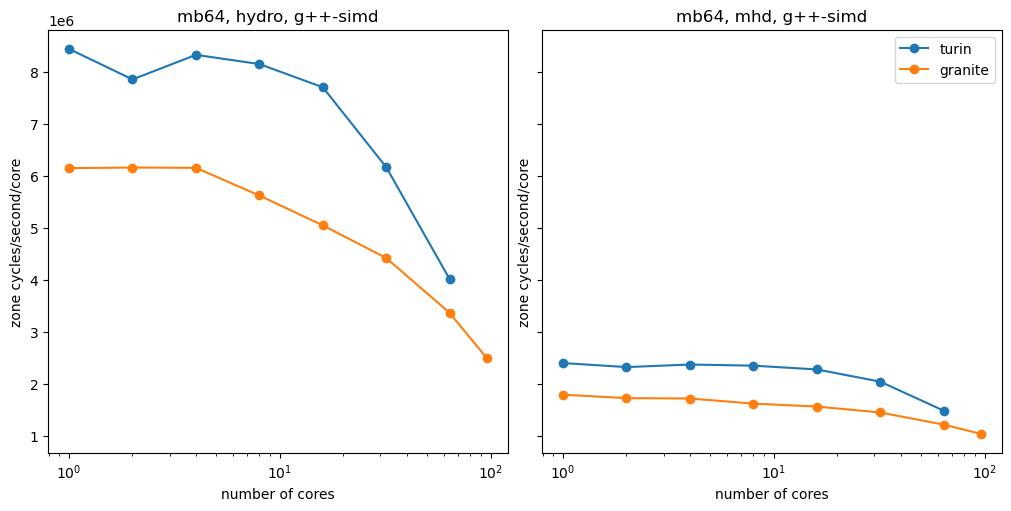

In [73]:
fig,axes = plt.subplots(1,2,figsize=(10,5),
                        sharey="row", sharex=True, constrained_layout=True)

mb="mb64"
for ax, physics in zip(axes,  ["hydro", "mhd"]):
    plt.sca(ax)

    CC = "g++-simd"
    plt.title(f"{mb}, {physics}, {CC}")
    for machine in ["turin", "granite"]:
        n, zcs = get_zcs(mb=mb,CC=CC,physics=physics,machine=machine)
        if len(zcs) == 0:
            continue
        plt.plot(n, zcs/n, 'o-', label=machine)

    plt.xscale("log")

    plt.ylabel("zone cycles/second/core")
    plt.xlabel("number of cores")
plt.legend()
# plt.savefig(f"blast-scaling-{machine}.png")

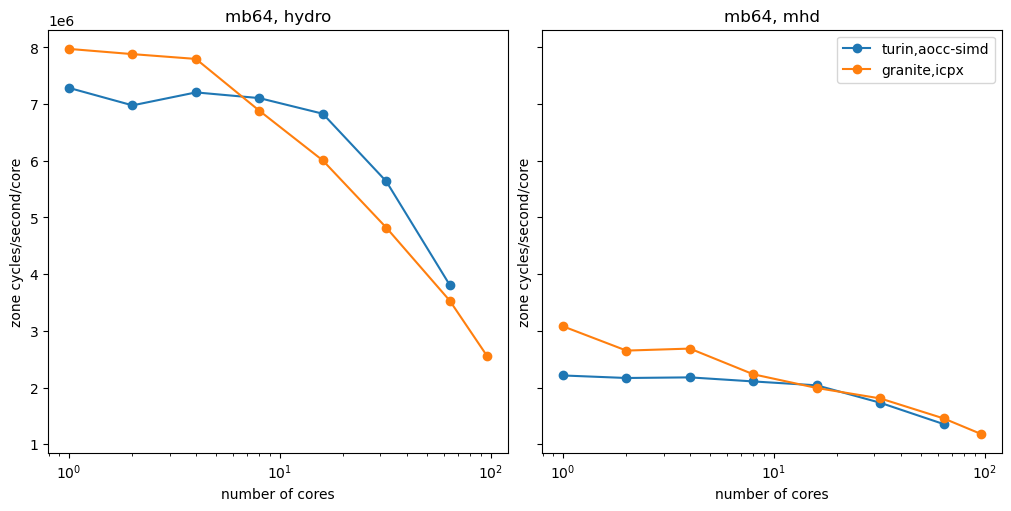

In [7]:
fig,axes = plt.subplots(1,2,figsize=(10,5),
                        sharey="row", sharex=True, constrained_layout=True)

mb="mb64"
for ax, physics in zip(axes,  ["hydro", "mhd"]):
    plt.sca(ax)
    plt.title(f"{mb}, {physics}")
    for machine, CC in zip(["turin", "granite"],["aocc-simd", "icpx"]):
        n, zcs = get_zcs(mb=mb,CC=CC,physics=physics,machine=machine)
        if len(zcs) == 0:
            continue
        plt.plot(n, zcs/n, 'o-', label=f"{machine},{CC}")

    plt.xscale("log")

    plt.ylabel("zone cycles/second/core")
    plt.xlabel("number of cores")
plt.legend()
# plt.savefig(f"blast-scaling-{machine}.png")

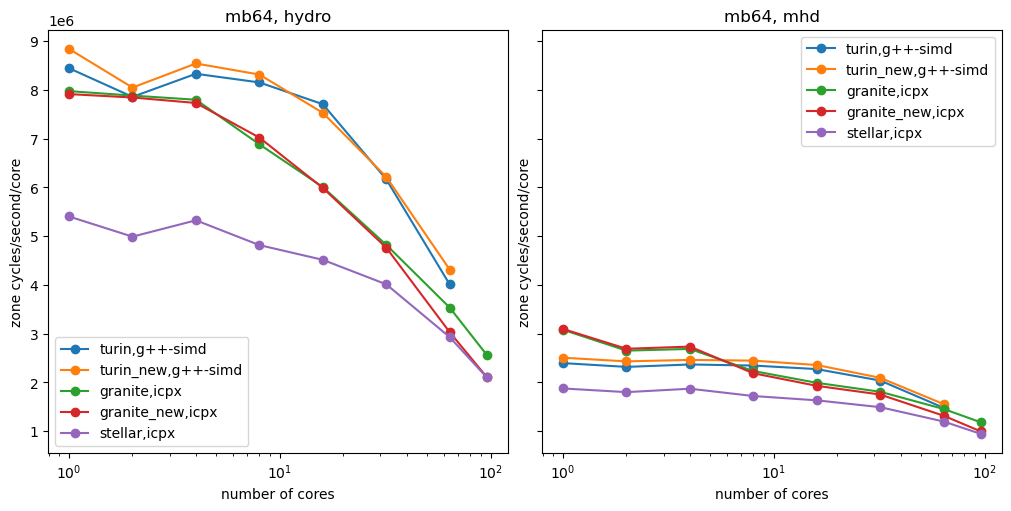

In [25]:
fig,axes = plt.subplots(1,2,figsize=(10,5),
                        sharey="row", sharex=True, constrained_layout=True)

mb="mb64"
for ax, physics in zip(axes,  ["hydro", "mhd"]):
    plt.sca(ax)
    plt.title(f"{mb}, {physics}")
    for machine, CC in zip(["turin", "turin_new", "granite", "granite_new", "stellar"],
                           ["g++-simd", "g++-simd", "icpx", "icpx", "icpx"]):
        n, zcs = get_zcs(mb=mb,CC=CC,physics=physics,machine=machine)
        if len(zcs) == 0:
            continue
        plt.plot(n, zcs/n, 'o-', label=f"{machine},{CC}")

    plt.xscale("log")

    plt.ylabel("zone cycles/second/core")
    plt.xlabel("number of cores")
    plt.legend()
# plt.savefig(f"blast-scaling-{machine}.png")

turin 7665525.205064905 254736651.12997454
granite 7036160.871333087 284697164.1816911
turin 2296123.39981543 83147398.51162274
granite 2533957.6462218375 102913630.1358211


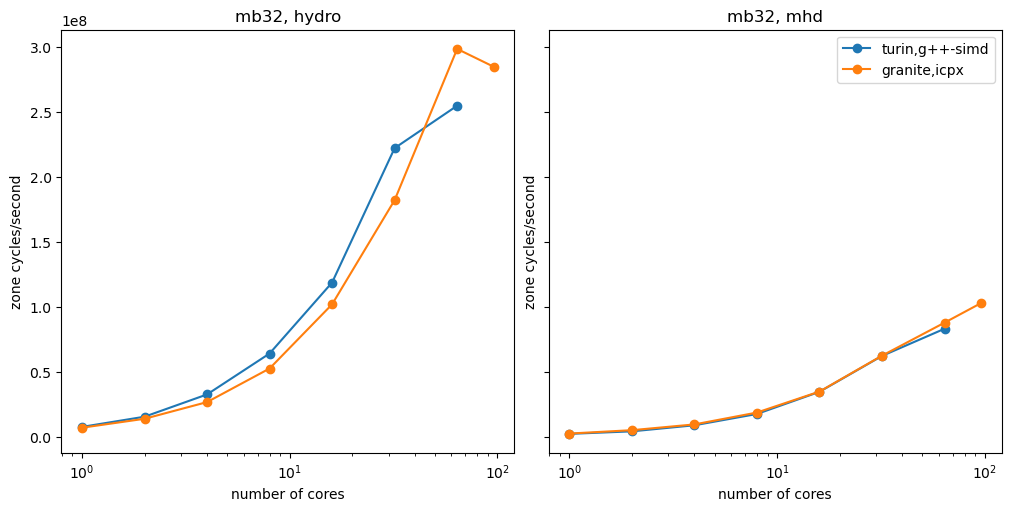

In [15]:
fig,axes = plt.subplots(1,2,figsize=(10,5),
                        sharey="row", sharex=True, constrained_layout=True)

mb="mb32"
for ax, physics in zip(axes,  ["hydro", "mhd"]):
    plt.sca(ax)
    plt.title(f"{mb}, {physics}")
    # for machine, CC in zip(["turin", "granite", "stellar"],["g++-simd", "icpx", "icpx"]):
    for machine, CC in zip(["turin", "turin_new", "granite", "granite_new", "stellar"],
                           ["g++-simd", "g++-simd", "icpx", "icpx", "icpx"]):
        n, zcs = get_zcs(mb=mb,CC=CC,physics=physics,machine=machine)
        if len(zcs) == 0:
            continue
        plt.plot(n, zcs, 'o-', label=f"{machine},{CC}")
        print(machine,zcs[0],zcs[-1])
    plt.xscale("log")

    plt.ylabel("zone cycles/second")
    plt.xlabel("number of cores")
plt.legend()
# plt.savefig(f"blast-scaling-{machine}.png")